In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("elevador_lacerda.csv", sep=';')

In [4]:
df.head()

,comentario,nota,data
0,"A vista é muito bonita, mas tem melhores. A ex...",3.0,mar de 2023
1,"Ponto bem interessante! Muito organizado, útil...",5.0,mar de 2023
2,Perfeição! Sem dúvida a vista mais linda que e...,5.0,out de 2022
3,"O elevador em si, é interessante, um ponto his...",2.0,dez de 2022
4,"Uma vista incrível.Não é só para embelezar, é ...",4.0,fev de 2023


In [6]:
!pip install nltk

In [9]:
import nltk

In [10]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
comentarios = df['comentario']

display(comentarios.head())

,comentario
0,"A vista é muito bonita, mas tem melhores. A ex..."
1,"Ponto bem interessante! Muito organizado, útil..."
2,Perfeição! Sem dúvida a vista mais linda que e...
3,"O elevador em si, é interessante, um ponto his..."
4,"Uma vista incrível.Não é só para embelezar, é ..."


In [25]:
tokens = df['comentario'].astype(str).apply(word_tokenize, language='portuguese')

display(tokens.head())

,comentario
0,"[A, vista, é, muito, bonita, ,, mas, tem, melh..."
1,"[Ponto, bem, interessante, !, Muito, organizad..."
2,"[Perfeição, !, Sem, dúvida, a, vista, mais, li..."
3,"[O, elevador, em, si, ,, é, interessante, ,, u..."
4,"[Uma, vista, incrível.Não, é, só, para, embele..."


In [17]:
stop_words = set(stopwords.words('portuguese'))

tokens_filtrados = [[word for word in comment_tokens if word.lower() not in stop_words and word.isalpha()]
                    for comment_tokens in tokens]

display(tokens_filtrados[:5])

[['vista',
  'bonita',
  'melhores',
  'experiência',
  'elevador',
  'nada',
  'imaginava',
  'elevador',
  'normal',
  'tocando',
  'funk',
  'último',
  'volume'],
 ['Ponto',
  'bem',
  'interessante',
  'organizado',
  'útil',
  'bem',
  'estruturado',
  'Bom',
  'turistas',
  'população',
  'local',
  'vista',
  'maravilhosa'],
 ['Perfeição',
  'dúvida',
  'vista',
  'linda',
  'vi',
  'hoje',
  'perfeito',
  'demais',
  'Sugiro',
  'contratar',
  'fotógrafos',
  'pra',
  'acompanharem',
  'passeio',
  'pois',
  'consegue',
  'fotos',
  'incríveis'],
 ['elevador',
  'si',
  'interessante',
  'ponto',
  'histórico',
  'Porém',
  'tudo',
  'Salvador',
  'nada',
  'dito',
  'placa',
  'explicativa',
  'história',
  'lugar',
  'ponto',
  'tirar',
  'foto',
  'fedido',
  'Cheiro',
  'xixi',
  'fortíssimo',
  'ponto',
  'precisar',
  'sair',
  'perto',
  'pra',
  'respirar',
  'Pra',
  'tirar',
  'foto',
  'prender',
  'respiração',
  'fingir',
  'sorriso',
  'sair',
  'correndo',
  'ti

In [26]:
print (tokens)

0       [A, vista, é, muito, bonita, ,, mas, tem, melh...
1       [Ponto, bem, interessante, !, Muito, organizad...
2       [Perfeição, !, Sem, dúvida, a, vista, mais, li...
3       [O, elevador, em, si, ,, é, interessante, ,, u...
4       [Uma, vista, incrível.Não, é, só, para, embele...
                              ...                        
6738    [O, Elevador, Lacerda, é, ,, sem, dúvida, ,, a...
6739    [O, Elevador, Lacerda, é, um, elevador, histór...
6740    [Este, elevador, é, o, meio, mais, rápido, e, ...
6741    [Nos, dias, de, semana, há, um, pouco, de, uma...
6742    [Não, muito, dizer, exceto, ``, não, têm, medo...
Name: comentario, Length: 6743, dtype: object


In [27]:
print (tokens_filtrados)

[['vista', 'bonita', 'melhores', 'experiência', 'elevador', 'nada', 'imaginava', 'elevador', 'normal', 'tocando', 'funk', 'último', 'volume'], ['Ponto', 'bem', 'interessante', 'organizado', 'útil', 'bem', 'estruturado', 'Bom', 'turistas', 'população', 'local', 'vista', 'maravilhosa'], ['Perfeição', 'dúvida', 'vista', 'linda', 'vi', 'hoje', 'perfeito', 'demais', 'Sugiro', 'contratar', 'fotógrafos', 'pra', 'acompanharem', 'passeio', 'pois', 'consegue', 'fotos', 'incríveis'], ['elevador', 'si', 'interessante', 'ponto', 'histórico', 'Porém', 'tudo', 'Salvador', 'nada', 'dito', 'placa', 'explicativa', 'história', 'lugar', 'ponto', 'tirar', 'foto', 'fedido', 'Cheiro', 'xixi', 'fortíssimo', 'ponto', 'precisar', 'sair', 'perto', 'pra', 'respirar', 'Pra', 'tirar', 'foto', 'prender', 'respiração', 'fingir', 'sorriso', 'sair', 'correndo', 'tirar', 'foto', 'ângulo', 'específico', 'apareça', 'nada', 'edificações', 'porque', 'tudo', 'caindo', 'pedaços', 'literalmente', 'tristeza', 'cidade', 'históri

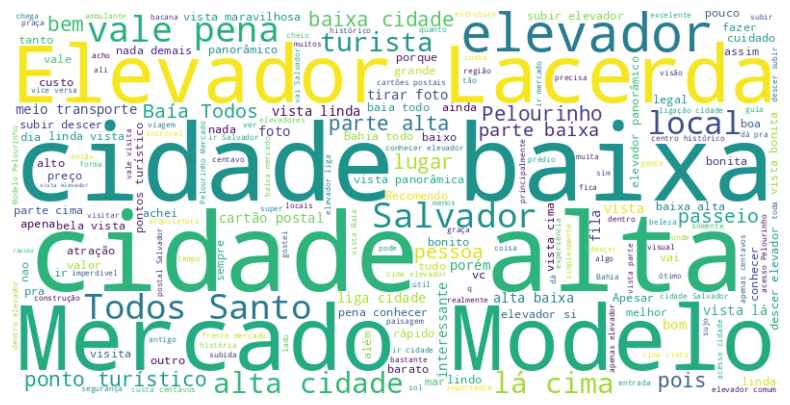

In [32]:
all_words = [word for comment_tokens in tokens_filtrados for word in comment_tokens]

texto = ' '.join(all_words)


nuvem = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(texto)


plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis("off")
plt.show()